# Darknet Economics - Sellers - Data Processing and Feature Engineering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import utils
from bs4 import BeautifulSoup

import nltk

In [2]:
sellers16 = pd.read_csv('data/DreamMarket2016_seller.csv')
sellers17 = pd.read_csv('data/DreamMarket2017_seller.csv')

## User-defined Functions

In [21]:
def convert_str_to_float(string):
    '''
    Transforms a string to a float.
    If string can
    
    Args:
        string (str) : Price is expected to start w/ a "$".
    
    Returns:
        adj_price (float) : Float object to be used for calculations/modelinng.
    
    '''

    try:
        
        if string.isnumeric():
            num_val = string
        
        else:
            tmp = re.sub(r'[^0-9.]', '', string)
            num_val = float(tmp)
                     
    except:
        num_val = np.NaN
    
    return num_val


## Raw Data

### 2016

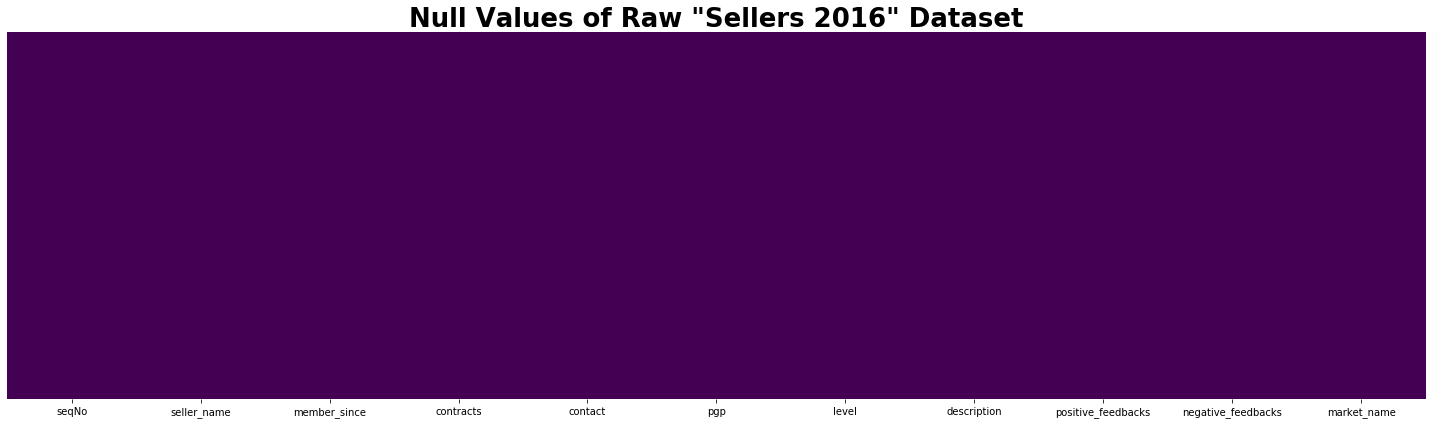

In [4]:
utils.plot_null_val_heatmap(sellers16, 'Null Values of Raw "Sellers 2016" Dataset', (20,6))

In [8]:
sellers16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               690 non-null    int64 
 1   seller_name         690 non-null    object
 2   member_since        690 non-null    object
 3   contracts           690 non-null    object
 4   contact             690 non-null    object
 5   pgp                 690 non-null    object
 6   level               690 non-null    object
 7   description         690 non-null    object
 8   positive_feedbacks  690 non-null    object
 9   negative_feedbacks  690 non-null    object
 10  market_name         690 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.4+ KB


In [10]:
sellers16.head()

,seqNo,seller_name,member_since,contracts,contact,pgp,level,description,positive_feedbacks,negative_feedbacks,market_name
0,1,0ldamsterdam,13/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\nVersion:...,-,\n-.-.-.-. OLDAMSTERDAM -.-.-.-.\n\nwe ship on...,4.83,-,Dream
1,2,2good4DN,09/05/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,\nWe are determined to offer even better produ...,4.76,-,Dream
2,3,420BLAZEUP,19/09/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,\n 420BLAZEUP \n\nWE ARE HE...,4.88,-,Dream
3,4,420BooBooKittyfk69,12/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,"\nRunning low on stock, if u are interested in...",4.85,-,Dream
4,5,ACAB2016,15/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,"\nHello, we are up and running again. We can d...",4.6Â,-,Dream


In [17]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers16[col].unique())

sellers16_v2 = sellers16.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [22]:
sellers16_v2['feedback_cleaned'] = sellers16_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))

In [23]:
sellers16_v2.head()

,seqNo,seller_name,member_since,pgp,description,positive_feedbacks,feedback_cleaned
0,1,0ldamsterdam,13/07/2016,-----BEGIN PGP PUBLIC KEY BLOCK-----\nVersion:...,\n-.-.-.-. OLDAMSTERDAM -.-.-.-.\n\nwe ship on...,4.83,4.83
1,2,2good4DN,09/05/2016,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,\nWe are determined to offer even better produ...,4.76,4.76
2,3,420BLAZEUP,19/09/2016,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,\n 420BLAZEUP \n\nWE ARE HE...,4.88,4.88
3,4,420BooBooKittyfk69,12/07/2016,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,"\nRunning low on stock, if u are interested in...",4.85,4.85
4,5,ACAB2016,15/07/2016,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,"\nHello, we are up and running again. We can d...",4.6Â,4.60


### 2017

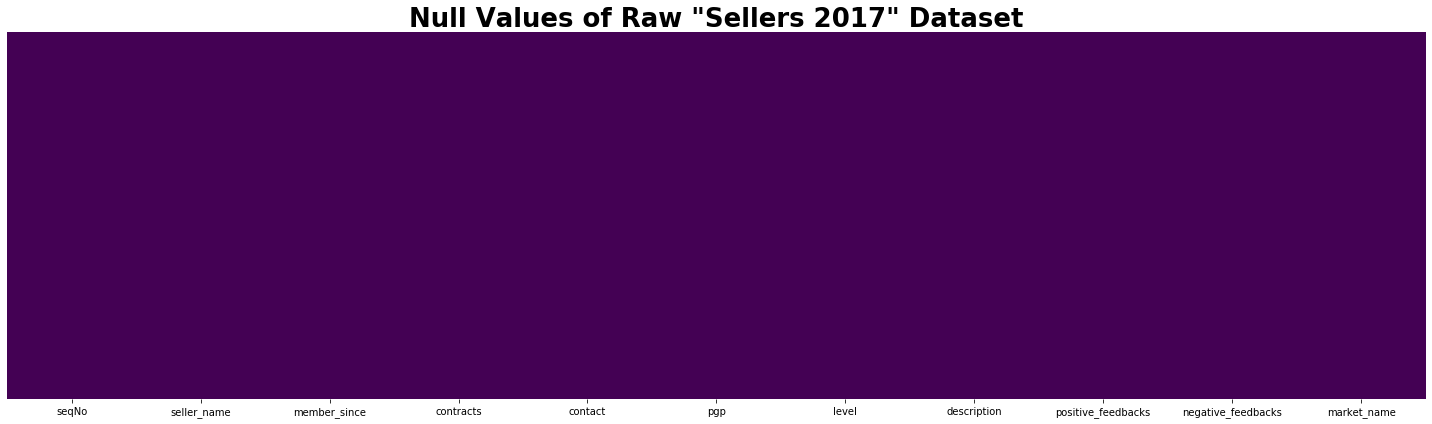

In [5]:
utils.plot_null_val_heatmap(sellers17, 'Null Values of Raw "Sellers 2017" Dataset', (20,6))

In [14]:
sellers17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               2092 non-null   int64 
 1   seller_name         2092 non-null   object
 2   member_since        2092 non-null   object
 3   contracts           2092 non-null   object
 4   contact             2092 non-null   object
 5   pgp                 2092 non-null   object
 6   level               2092 non-null   object
 7   description         2092 non-null   object
 8   positive_feedbacks  2092 non-null   object
 9   negative_feedbacks  2092 non-null   object
 10  market_name         2092 non-null   object
dtypes: int64(1), object(10)
memory usage: 179.9+ KB


In [18]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers17[col].unique())
    
sellers17_v2 = sellers17.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [24]:
sellers17_v2['feedback_cleaned'] = sellers17_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))

---
## EDA

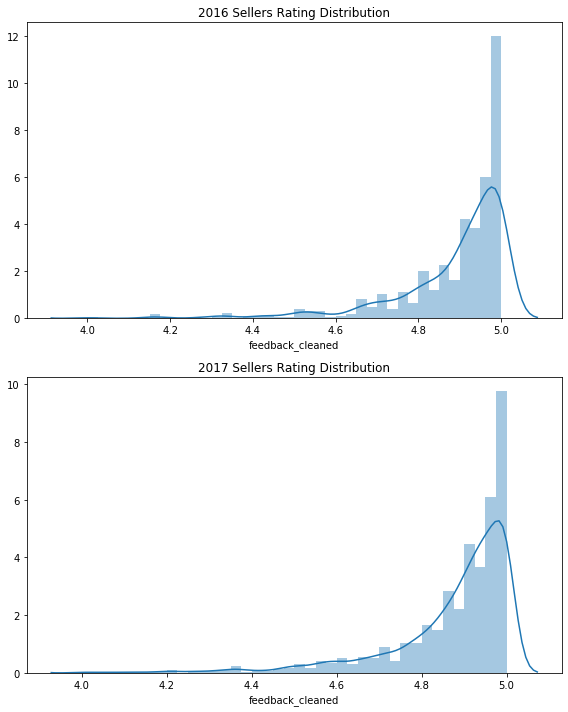

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

sns.distplot(sellers16_v2['feedback_cleaned'], bins= 40, ax=ax1)
ax1.set_title('2016 Sellers Rating Distribution')

sns.distplot(sellers17_v2['feedback_cleaned'], bins= 40, ax=ax2)
ax2.set_title('2017 Sellers Rating Distribution')

plt.tight_layout();